In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/advertising (1).csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df1= df.drop(['Radio','Newspaper'], axis = 1)

In [8]:
df1.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [10]:
df1.shape

(200, 2)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [12]:
df1.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


## Splitting the dataset

In [13]:
X = df1['TV']
y= df1['Sales']

# Visual EDA

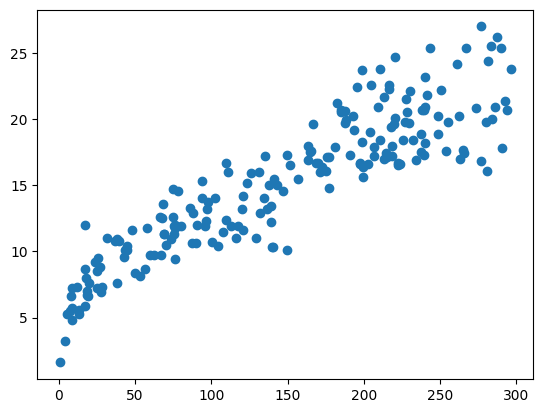

In [15]:
plt.scatter(X, y)

In [16]:
import seaborn as sns

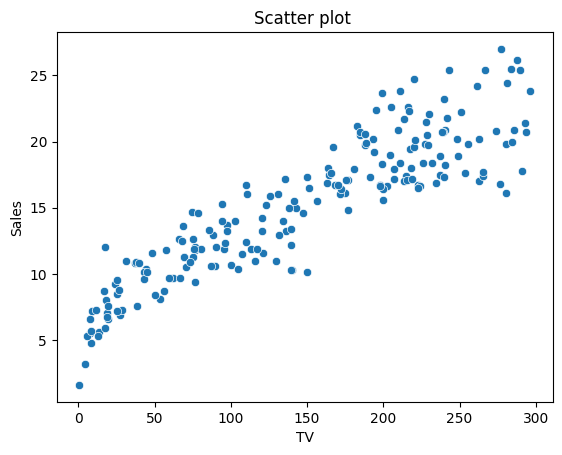

In [17]:
sns.scatterplot(data=df1, x='TV', y='Sales')

# Add labels and title
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter plot ')

# Show the plot
plt.show()

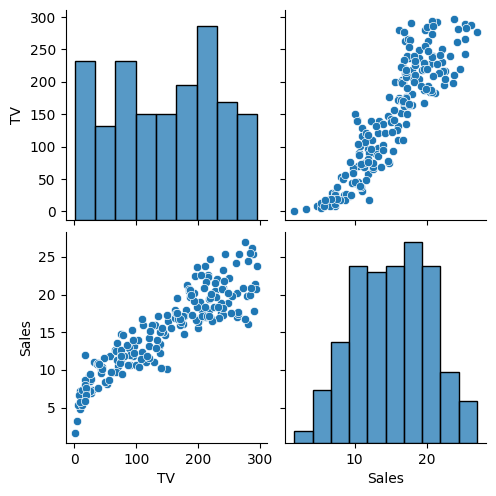

In [18]:
sns.pairplot(df1)

In [19]:
X.shape


(200,)

In [20]:
y.shape

(200,)

In [27]:
X=X.values.reshape(200,1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [26]:
X.shape

(200, 1)

In [28]:
y=y.values.reshape(200,1)

In [30]:
y.shape

(200, 1)

# Performing Simple linear regression

In [31]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lm.predict(X_test)

## Model slope and intercept term

In [44]:
a = lm.coef_[0]  # For a single feature, this is a 1D array
b = lm.intercept_

print(f"Slope (Coefficient): {a}")
print(f"Intercept: {b}")

Slope (Coefficient): [0.05483488]
Intercept: [7.20655455]


In [45]:
y_pred

array([[16.16109107],
       [17.92129084],
       [23.26769201],
       [ 7.84812269],
       [19.28667945],
       [11.32465432],
       [19.09475735],
       [ 9.94829874],
       [19.4018327 ],
       [16.8081427 ],
       [ 8.93385339],
       [10.28827502],
       [20.0653348 ],
       [ 7.50266292],
       [14.85602084],
       [16.53945177],
       [ 7.6068492 ],
       [18.04192759],
       [11.3356213 ],
       [20.22435596],
       [19.79116038],
       [10.92435967],
       [ 9.29028013],
       [20.96462689],
       [10.99016153],
       [10.14022083],
       [18.91380224],
       [14.84505386],
       [11.98815642],
       [ 7.66716757],
       [18.16256433],
       [11.00112851],
       [18.11321294],
       [ 8.13326408],
       [22.59870643],
       [20.26822387],
       [ 9.85507944],
       [22.21486224],
       [13.63320293],
       [ 8.71451385],
       [13.56740107],
       [16.91232898],
       [ 9.56993804],
       [10.62276781],
       [19.48956852],
       [ 9

### prediction for all X present in the dataset

In [47]:
y_pred1 = lm.predict(X)

In [48]:
y_pred1

array([[19.82406131],
       [ 9.64670688],
       [ 8.14971455],
       [15.51403944],
       [17.12070154],
       [ 7.68361804],
       [10.35956037],
       [13.79770758],
       [ 7.67813455],
       [18.16256433],
       [10.83114037],
       [18.9796041 ],
       [ 8.51162478],
       [12.55295572],
       [18.39835433],
       [17.92129084],
       [10.92435967],
       [22.63709085],
       [11.00112851],
       [15.28373293],
       [19.18249317],
       [20.22435596],
       [ 7.93037501],
       [19.72535852],
       [10.62276781],
       [21.6226455 ],
       [15.04245944],
       [20.37241015],
       [20.84947364],
       [11.07789734],
       [23.26769201],
       [13.39741293],
       [12.53650525],
       [21.77069968],
       [12.45425293],
       [23.14705527],
       [21.84198503],
       [11.30272037],
       [ 9.56993804],
       [19.70890805],
       [18.31061852],
       [16.91232898],
       [23.30607643],
       [18.55189201],
       [ 8.58291013],
       [16

# RMSE

In [49]:
from sklearn.metrics import mean_squared_error

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print (f"root mean square error : {rmse}")

root mean square error : 2.2758570698017597


In [53]:
r2 = r2_score(y_test, y_pred)
r2

0.814855389208679

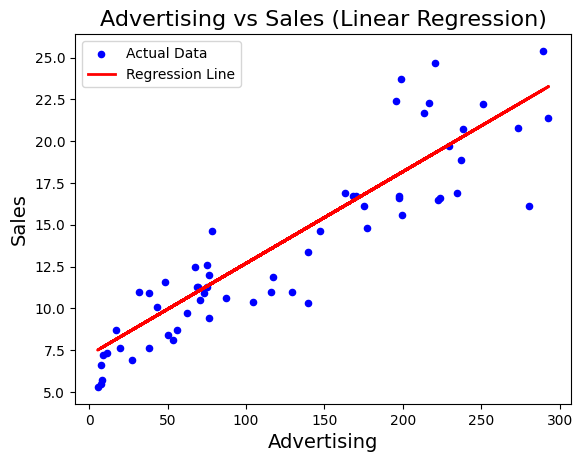

In [66]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data', s=20)

# Regression line plot
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Advertising vs Sales (Linear Regression)', fontsize=16)
plt.xlabel('Advertising', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.show()

## Residual Plot

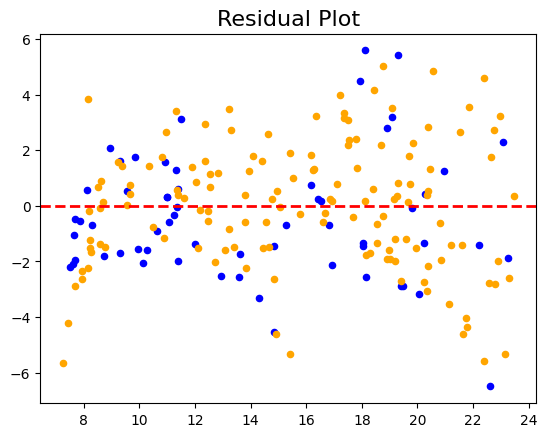

In [79]:
residuals = y_test - y_pred

# Step 7: Plot residuals
plt.scatter(y_pred, residuals, color='blue', s=20)
plt.scatter(y_pred_train, residuals_train, color='orange', s=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot', fontsize=16)

plt.show()

## Overfitting and Underfitting

In [72]:
r2 = r2_score(y_test, y_pred)
print(f"Test set score : {r2}")

Test set score : 0.814855389208679


In [73]:
y_pred_train = lm.predict(X_train)

In [77]:
residuals_train = y_train-y_pred_train

In [74]:
r2_train = r2_score(y_train, y_pred_train)
print(f"Train set score : {r2_train}")

Train set score : 0.799626928219267
